# Convolutional Neural Networks para Classificação de Imagens

Utilizando o Conjunto de Dados [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

Iniciamos importando as bibliotecas básicas necessárias

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

Carregamos os Dados e Dividimos eles em Treinamento e Teste

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Imprimimos o formato dos Dados de Treinamento

60.000 imagens de dimensões 28x28 pixels

In [7]:
print(x_train.shape)

(60000, 28, 28)


Projetamos o Gráfico da Imagem de Índice 3

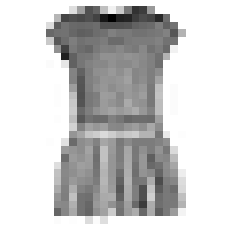

In [6]:
plt.imshow(x_train[3],cmap='binary');
plt.axis('off');

Imprimimos o Valor Máximo e Mínimo encontrados na Matriz de Números da Imagem

In [8]:
print(f'Valor Máximo: {x_train.max()}')
print(f'Valor Mínimo: {x_train.min()}')

Valor Máximo: 255
Valor Mínimo: 0


Performamos o Scaling dos Dados dividindo-os por **255**

In [9]:
x_train = x_train / 255
x_test = x_test / 255

Alteramos a Dimensão dos Dados para podermos alimentar o Algoritmo

Eles atualmente estão em 2 Dimensões e precisam ser alterados para 3 Dimensões *(height, width, color)*

In [10]:
x_train = x_train.reshape(60_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)

Verificamos o Número de Classes Disponíveis

In [11]:
K = len(set(y_train))
print(f'Número de classes = {K}')

Número de classes = 10


Transformamos os Targets em Categóricos

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

Construímos o Modelo utilizando a API Funcional Keras

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Imprimimos o Sumário de nosso Modelo para Referência

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


Treinamos o Modelo

In [18]:
model.fit(x_train, y_categorical_train, validation_data=(x_test, y_categorical_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4041 - accuracy: 0.8554 - val_loss: 0.3298 - val_accuracy: 0.8812
Epoch 2/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2786 - accuracy: 0.8986 - val_loss: 0.2964 - val_accuracy: 0.8922
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2337 - accuracy: 0.9129 - val_loss: 0.2786 - val_accuracy: 0.8970
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2031 - accuracy: 0.9240 - val_loss: 0.2746 - val_accuracy: 0.8983
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1770 - accuracy: 0.9338 - val_loss: 0.2530 - val_accuracy: 0.9075


Analisamos as Métricas de Desempenho do Modelo

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.404112,0.855433,0.329792,0.8812
1,0.278574,0.898633,0.296377,0.8922
2,0.233739,0.912867,0.278626,0.8970
3,0.203067,0.924017,0.274590,0.8983
4,0.177010,0.933800,0.253037,0.9075


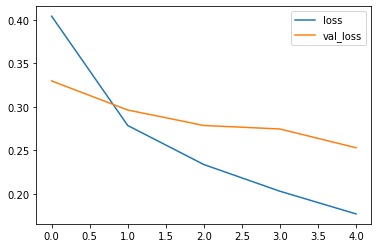

In [22]:
metrics[['loss','val_loss']].plot();

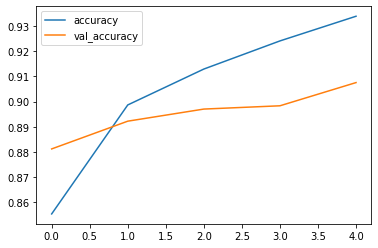

In [23]:
metrics[['accuracy','val_accuracy']].plot();

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.86      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.88      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.75      0.75      1000
           7       0.98      0.94      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Função que irá Projetar uma Matriz de Confusão Completa

In [28]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Função que imprime e plota a Matriz de Confusão.
    Normalização pode ser aplicada ao setar o parâmetro 'Normalize = True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Matriz de Confusão Normalizada')
    else:
        print('Matriz de Confusão sem Normalização')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j],fmt), horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()

Matriz de Confusão sem Normalização
[[809   0  24  33   4   1 122   0   7   0]
 [  0 983   1   9   4   0   1   0   2   0]
 [ 12   0 863   6  63   0  55   0   1   0]
 [  2  11  11 910  38   0  27   0   1   0]
 [  2   1  57  12 882   0  44   0   2   0]
 [  0   0   0   0   0 984   0   4   0  12]
 [ 68   2  75  29  68   0 751   0   7   0]
 [  0   0   0   0   0  13   0 939   0  48]
 [  6   1   3   3   3   2   6   1 975   0]
 [  0   0   0   0   0   6   1  14   0 979]]


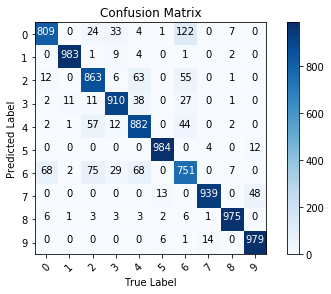

In [29]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Mapeamento de Labels

In [31]:
labels = """
T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot""".split()
print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']


Apresentamos alguns Exemplos que foram Classificados Erroneamente pelo Modelo

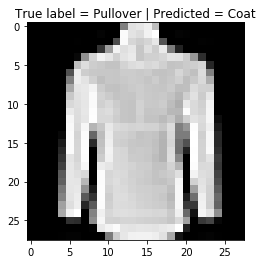

In [36]:
index_miss_classified = np.where(p_test != y_test)[0]
i = np.random.choice(index_miss_classified)
plt.imshow(x_test[i].reshape(28,28), cmap='gray');
plt.title(f'True label = {labels[y_test[i]]} | Predicted = {labels[p_test[i]]}');